<a href="https://colab.research.google.com/github/MonikaLamba/Tensor-Flow-/blob/main/TensorFlow_FDP_Day_3_1_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


import tensorflow as tf


In [2]:
import tensorflow as tf


Load the Fashion MNIST dataset


In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Normalize the pixel values


In [4]:
training_images = training_images / 255.0
test_images = test_images / 255.0


Define the model


In [5]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation=tf.nn.relu),
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


Setup training parameters


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model


In [9]:
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4956 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3734 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3345 - accuracy: 0.8765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3117 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8916


Evaluate on the test set


In [10]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 1s 1ms/step - loss: 0.3407 - accuracy: 0.8761


Define the model


In [11]:
model = tf.keras.models.Sequential([

# Add convolutions and max pooling,,,# 1 is color depth for Grey Image required 8 colors, 32 is filter, (3,3) is size of filter each, data set image is 28*28 and 1 is color depth
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),


tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

# Add the same layers as before
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])


Print the model summary



In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Use same settings


In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Train the model


In [14]:
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)



MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4688 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3179 - accuracy: 0.8842
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2736 - accuracy: 0.8986
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2439 - accuracy: 0.9082
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2211 - accuracy: 0.9180


Evaluate on the test set



MODEL EVALUATION:
313/313 [==============================] - 2s 5ms/step - loss: 0.2716 - accuracy: 0.8987
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
1/1 [==============================] - 0s 17ms/step


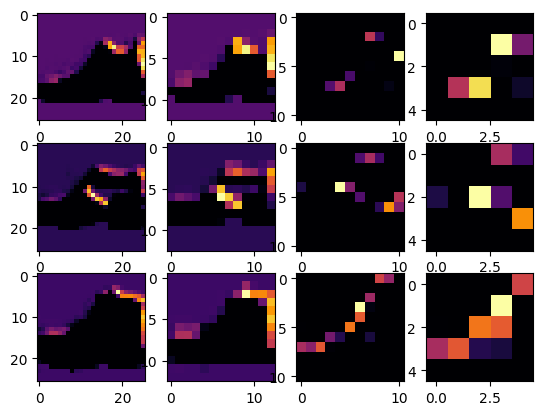

In [17]:
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)
#Visualizing the Convolutions and Pooling
print(test_labels[:100])
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

